In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('All.csv')

In [3]:
dataset.head(100)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.000000,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,68,3,13,6.0,12,2.666667,3,32,25,0,...,14,13,12,0.641928,0.806164,NaN,0.653236,0.652200,0.646627,Defacement
96,135,3,8,6.0,12,2.666667,3,25,15,18,...,7,6,5,0.721754,0.806164,NaN,0.736367,0.737990,0.737002,Defacement
97,74,3,15,6.0,12,2.666667,3,37,23,0,...,13,12,11,0.656420,0.806164,NaN,0.665144,0.665753,0.660915,Defacement
98,68,3,14,6.0,12,2.666667,3,36,22,0,...,13,12,11,0.661585,0.806164,NaN,0.671344,0.676353,0.667697,Defacement


In [4]:
dataset.shape

(36707, 80)

In [5]:
#  change the value of URL_Type_obf_Type
# 0: benign 1:defacement 2: phishing 3: malware 4:spam


dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4


In [6]:
dataset = pd.DataFrame(dataset)


In [7]:
##drop rows containing NaN value

dataset.dropna(inplace = True)
print(dataset.shape)
dataset

(18982, 80)


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
35,0,4,4,6.250000,17,3.750000,4,4,2,0,...,1,0,-1,0.726945,0.768811,0.916667,1.000000,1.000000,-1.000000,1
37,22,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.686486,0.768811,0.916667,0.748105,0.757206,0.749167,1
38,23,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268,1
39,22,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.683476,0.768811,0.916667,0.742090,0.750292,0.741506,1
40,23,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,4
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,4
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,4
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,4


In [8]:
X = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [9]:
X[:100]

array([[ 0.        ,  4.        ,  4.        , ...,  1.        ,
         1.        , -1.        ],
       [22.        ,  4.        , 10.        , ...,  0.74810535,
         0.7572058 ,  0.74916678],
       [23.        ,  4.        , 10.        , ...,  0.74762222,
         0.75629805,  0.74826769],
       ...,
       [ 0.        ,  3.        ,  4.        , ...,  0.92989669,
         0.57938016, -1.        ],
       [ 0.        ,  3.        ,  4.        , ...,  1.        ,
         1.        , -1.        ],
       [22.        ,  3.        , 10.        , ...,  0.74208986,
         0.75029241,  0.74150588]])

In [10]:
y[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Splitting Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)     

In [13]:
y_test[:100]

array([3, 2, 2, 0, 1, 2, 4, 3, 3, 1, 0, 3, 2, 2, 4, 3, 3, 0, 4, 0, 3, 4,
       4, 3, 1, 4, 3, 3, 2, 2, 2, 3, 0, 4, 3, 0, 0, 2, 2, 3, 4, 0, 0, 3,
       2, 4, 1, 3, 2, 1, 4, 0, 3, 0, 4, 4, 2, 1, 4, 3, 1, 1, 4, 2, 2, 3,
       2, 3, 2, 0, 3, 0, 3, 3, 1, 4, 0, 1, 2, 1, 2, 0, 4, 4, 2, 3, 4, 0,
       3, 3, 3, 2, 2, 2, 2, 4, 4, 3, 3, 2])

In [14]:
# apply RandomForest

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [15]:
y_pred =np.round(y_pred,0)
y_pred[:100]

array([3., 2., 2., 0., 1., 2., 4., 3., 3., 1., 0., 3., 2., 2., 4., 3., 3.,
       0., 4., 0., 3., 4., 4., 3., 1., 4., 3., 3., 2., 2., 2., 2., 0., 4.,
       3., 0., 0., 2., 2., 3., 4., 0., 0., 3., 2., 4., 1., 3., 2., 1., 4.,
       0., 3., 0., 4., 4., 2., 1., 4., 3., 1., 1., 4., 1., 3., 3., 2., 3.,
       2., 1., 3., 0., 3., 3., 1., 4., 0., 1., 2., 1., 2., 0., 4., 4., 2.,
       3., 4., 0., 3., 3., 3., 2., 1., 2., 2., 4., 4., 3., 3., 2.])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [46]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
score1= accuracy_score(y_test, y_pred)

[[ 459   40   14    1    0]
 [   1  464   27    4    0]
 [   6   33  717   40    5]
 [   1    1   27  891    0]
 [   1    1   14   28 1022]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       514
           1       0.86      0.94      0.90       496
           2       0.90      0.90      0.90       801
           3       0.92      0.97      0.95       920
           4       1.00      0.96      0.98      1066

    accuracy                           0.94      3797
   macro avg       0.93      0.93      0.93      3797
weighted avg       0.94      0.94      0.94      3797

0.9357387411114038


In [47]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_1 = knn.predict(X_test)

In [48]:
print(confusion_matrix(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))
print(accuracy_score(y_test, y_pred_1))
score2= accuracy_score(y_test, y_pred_1)

[[ 481    4   17   12    0]
 [   2  465   25    3    1]
 [  26   42  685   24   24]
 [   8    5   27  875    5]
 [   4    7   10    4 1041]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       514
           1       0.89      0.94      0.91       496
           2       0.90      0.86      0.88       801
           3       0.95      0.95      0.95       920
           4       0.97      0.98      0.97      1066

    accuracy                           0.93      3797
   macro avg       0.93      0.93      0.93      3797
weighted avg       0.93      0.93      0.93      3797

0.9341585462207006


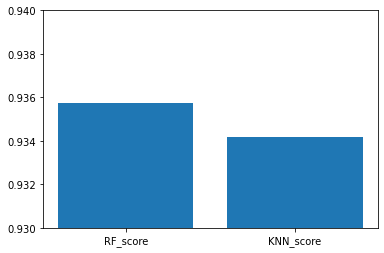

In [51]:
from matplotlib import pyplot as plt 
x =['RF_score','KNN_score']
y = [score1, score2]
plt.ylim(0.93, 0.94)
plt.bar(x,y)
plt.show()